<a href="https://colab.research.google.com/github/SteenaR/CognoRise_Internship/blob/main/CognoRise%5BTask2%5D_Shopper_Sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SHOPPER SENTIMENTAL ANALYSIS USING CUSTOMER REVIEWS**
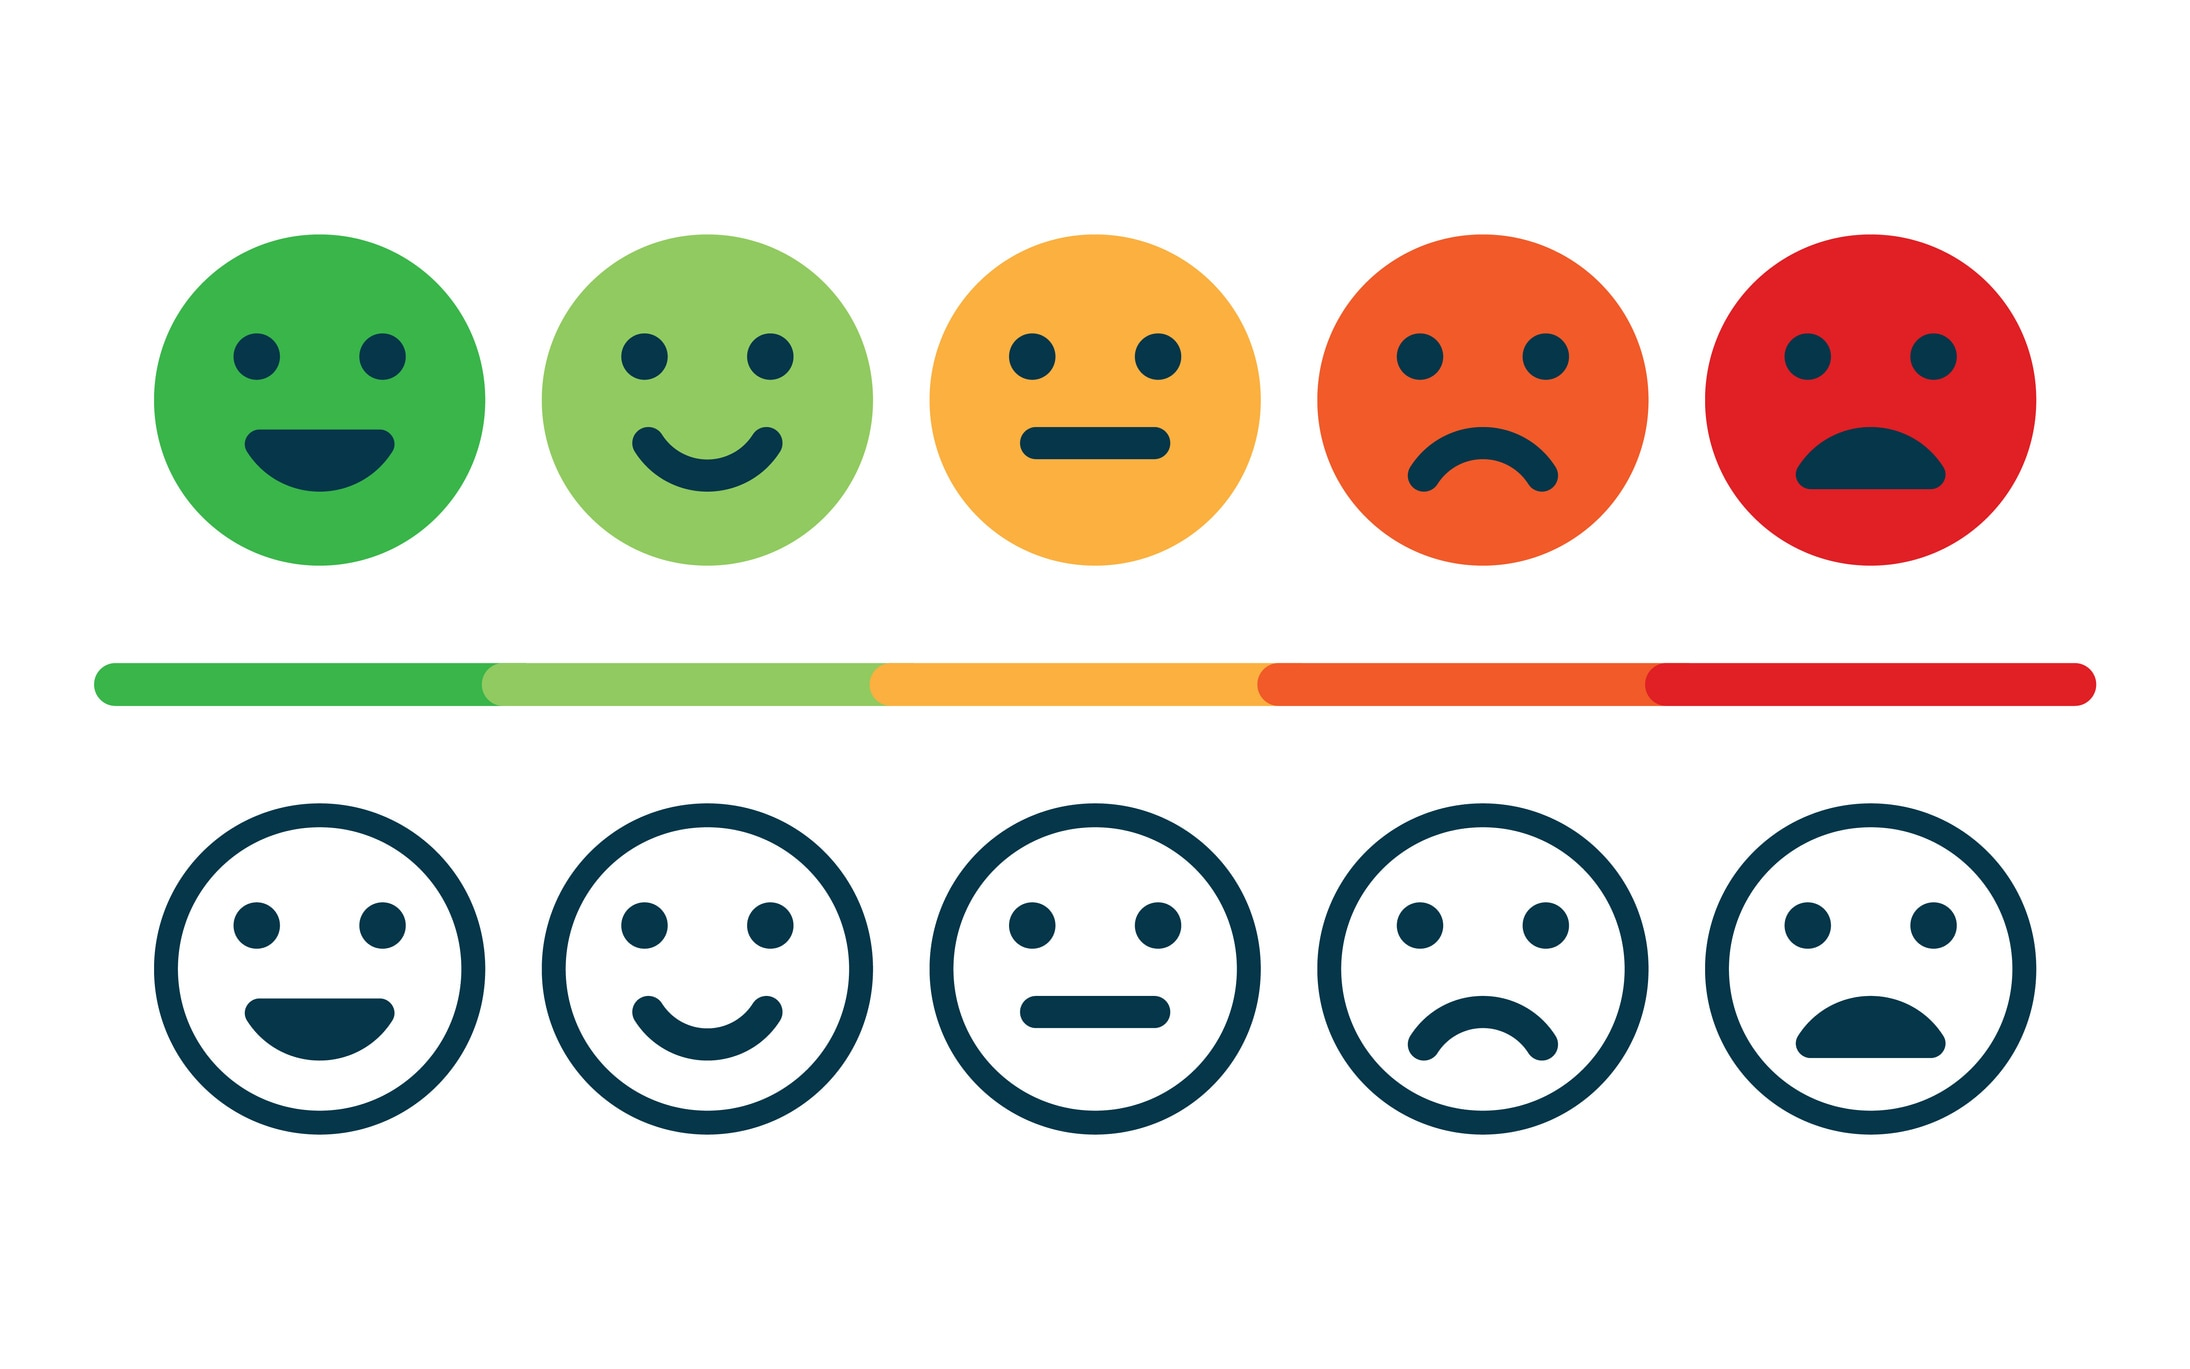

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

 **Loading Dataset**

In [ ]:
df = pd.read_csv('/content/TeePublic_review.csv', encoding='latin1')
df

reviewer_id store_location   latitude   longitude  date  month  \
0               0.0             US  37.090240  -95.712891  2023      6   
1               1.0             US  37.090240  -95.712891  2023      6   
2               2.0             US  37.090240  -95.712891  2023      6   
3               3.0             US  37.090240  -95.712891  2023      6   
4               4.0             CA  56.130366 -106.346771  2023      6   
...             ...            ...        ...         ...   ...    ...   
278095     278095.0             US  37.090240  -95.712891  2018      4   
278096     278096.0             HR  45.100000   15.200000  2018      4   
278097     278097.0             US  37.090240  -95.712891  2018      4   
278098     278098.0             US  37.090240  -95.712891  2018      4   
278099          NaN             US  37.090240  -95.712891  2018      4   

                 year                                            title  \
0       2015 00:00:00                       Great help with lost order   
1       2024 00:00:00    I ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2       2017 00:00:00      These guys offer the best customerï¿½ï¿½ï¿½   
3       2024 00:00:00                                       Good Stuff   
4       2023 00:00:00       My order arrived in a good timelyï¿½ï¿½ï¿½   
...               ...                                              ...   
278095  2027 00:00:00                                Highly recommend!   
278096  2027 00:00:00                                    Great quality   
278097  2027 00:00:00                                      Dudes rock.   
278098  2027 00:00:00  Shipping was fast the T-shirt was justï¿½ï¿½ï¿½   
278099  2027 00:00:00                                Not great quality   

                                                   review  review-label  
0       I had an order that was lost in transit. When ...             5  
1       I ordered the wrong size tee and had difficult...             5  
2       These guys offer the best customer service in ...             5  
3       Looked for an obscure phrase on a shirt. Teepu...             5  
4       My order arrived in a good timely fashion & th...             4  
...                                                   ...           ...  
278095  Delivery is quick, arrives when promised. Shir...             5  
278096     Great quality, fast delivery, would recommend!             5  
278097                             Dudes rock. Seriously.             5  
278098  Shipping was fast the T-shirt was just right g...             5  
278099  Print of t shirt was blurry and appeared faded...             2  

[278100 rows x 10 columns]

In [ ]:
df.head()

reviewer_id store_location   latitude   longitude  date  month  \
0          0.0             US  37.090240  -95.712891  2023      6   
1          1.0             US  37.090240  -95.712891  2023      6   
2          2.0             US  37.090240  -95.712891  2023      6   
3          3.0             US  37.090240  -95.712891  2023      6   
4          4.0             CA  56.130366 -106.346771  2023      6   

            year                                          title  \
0  2015 00:00:00                     Great help with lost order   
1  2024 00:00:00  I ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2  2017 00:00:00    These guys offer the best customerï¿½ï¿½ï¿½   
3  2024 00:00:00                                     Good Stuff   
4  2023 00:00:00     My order arrived in a good timelyï¿½ï¿½ï¿½   

                                              review  review-label  
0  I had an order that was lost in transit. When ...             5  
1  I ordered the wrong size tee and had difficult...             5  
2  These guys offer the best customer service in ...             5  
3  Looked for an obscure phrase on a shirt. Teepu...             5  
4  My order arrived in a good timely fashion & th...             4

In [ ]:
df.tail()

reviewer_id store_location  latitude  longitude  date  month  \
278095     278095.0             US  37.09024 -95.712891  2018      4   
278096     278096.0             HR  45.10000  15.200000  2018      4   
278097     278097.0             US  37.09024 -95.712891  2018      4   
278098     278098.0             US  37.09024 -95.712891  2018      4   
278099          NaN             US  37.09024 -95.712891  2018      4   

                 year                                            title  \
278095  2027 00:00:00                                Highly recommend!   
278096  2027 00:00:00                                    Great quality   
278097  2027 00:00:00                                      Dudes rock.   
278098  2027 00:00:00  Shipping was fast the T-shirt was justï¿½ï¿½ï¿½   
278099  2027 00:00:00                                Not great quality   

                                                   review  review-label  
278095  Delivery is quick, arrives when promised. Shir...             5  
278096     Great quality, fast delivery, would recommend!             5  
278097                             Dudes rock. Seriously.             5  
278098  Shipping was fast the T-shirt was just right g...             5  
278099  Print of t shirt was blurry and appeared faded...             2

**Columns In The Dataset**

In [ ]:
df.columns

Index(['reviewer_id', 'store_location', 'latitude', 'longitude', 'date',
       'month', 'year', 'title', 'review', 'review-label'],
      dtype='object')

**Number Of Columns And Rows**

In [ ]:
df.shape

(278100, 10)

**Information Of The Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     278099 non-null  float64
 1   store_location  278100 non-null  object 
 2   latitude        278100 non-null  float64
 3   longitude       278100 non-null  float64
 4   date            278100 non-null  int64  
 5   month           278100 non-null  int64  
 6   year            278100 non-null  object 
 7   title           278088 non-null  object 
 8   review          247597 non-null  object 
 9   review-label    278100 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 21.2+ MB


**Statistical Describtions**

In [ ]:
df.describe()

reviewer_id       latitude      longitude           date  \
count  278099.000000  278100.000000  278100.000000  278100.000000   
mean   139049.000000      37.189516     -88.182471    2020.889518   
std     80280.410593      10.217722      37.028084       1.390760   
min         0.000000     -40.900557    -172.104629    2018.000000   
25%     69524.500000      37.090240     -95.712891    2020.000000   
50%    139049.000000      37.090240     -95.712891    2021.000000   
75%    208573.500000      37.090240     -95.712891    2022.000000   
max    278098.000000      64.963051     174.885971    2023.000000   

               month   review-label  
count  278100.000000  278100.000000  
mean        7.195329       4.409730  
std         3.678214       1.178112  
min         1.000000       1.000000  
25%         4.000000       4.000000  
50%         7.000000       5.000000  
75%        11.000000       5.000000  
max        12.000000       5.000000

In [ ]:
df.describe(include='object')

store_location           year                   title         review
count          278100         278100                  278088         247597
unique            141             31                  193993         246427
top                US  2028 00:00:00  Great customer service  Great service
freq           249328          10239                    1252             27

**DataType Of The Dataset**

In [ ]:
df.dtypes

reviewer_id       float64
store_location     object
latitude          float64
longitude         float64
date                int64
month               int64
year               object
title              object
review             object
review-label        int64
dtype: object

**Checking Missing Values And Handling it**

In [ ]:
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

**Checking for Duplicates vales**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['store_location'].value_counts()

store_location
US    221963
CA     11833
GB      4206
AU      4159
DE      1000
       ...  
SY         1
GP         1
KH         1
TC         1
BO         1
Name: count, Length: 134, dtype: int64

In [ ]:
df['review-label'].value_counts()

review-label
5    181426
4     22943
1     16746
3     15743
2     10729
Name: count, dtype: int64

**Data Visualization**

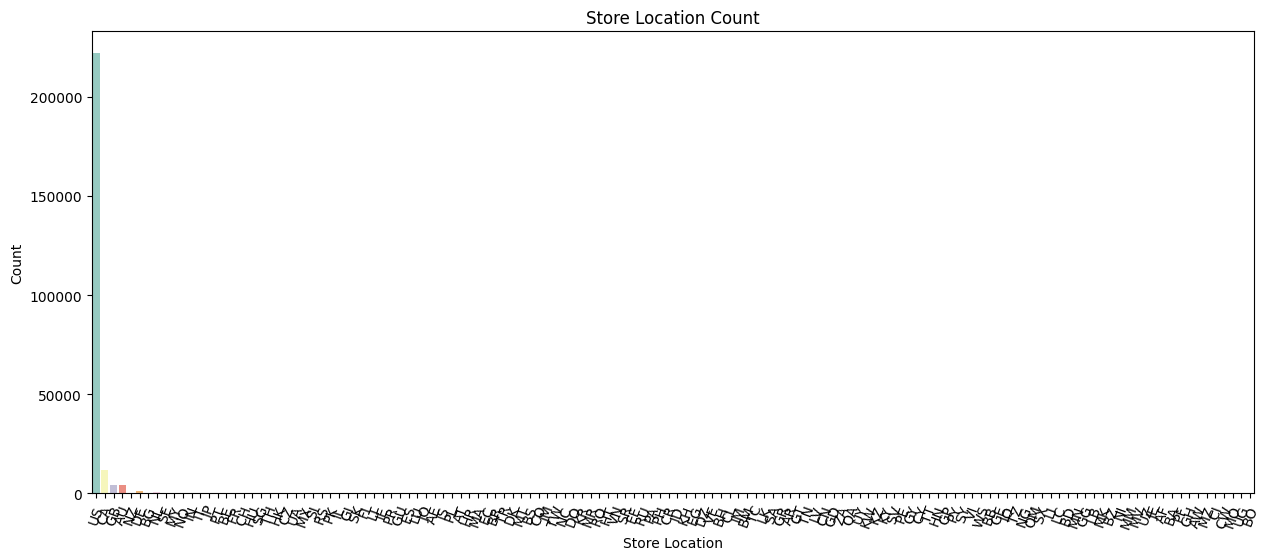

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'store_location', data = df, palette = 'Set3')
plt.xticks(rotation=70)
plt.title('Store Location Count')
plt.xlabel('Store Location')
plt.ylabel('Count')
plt.show()

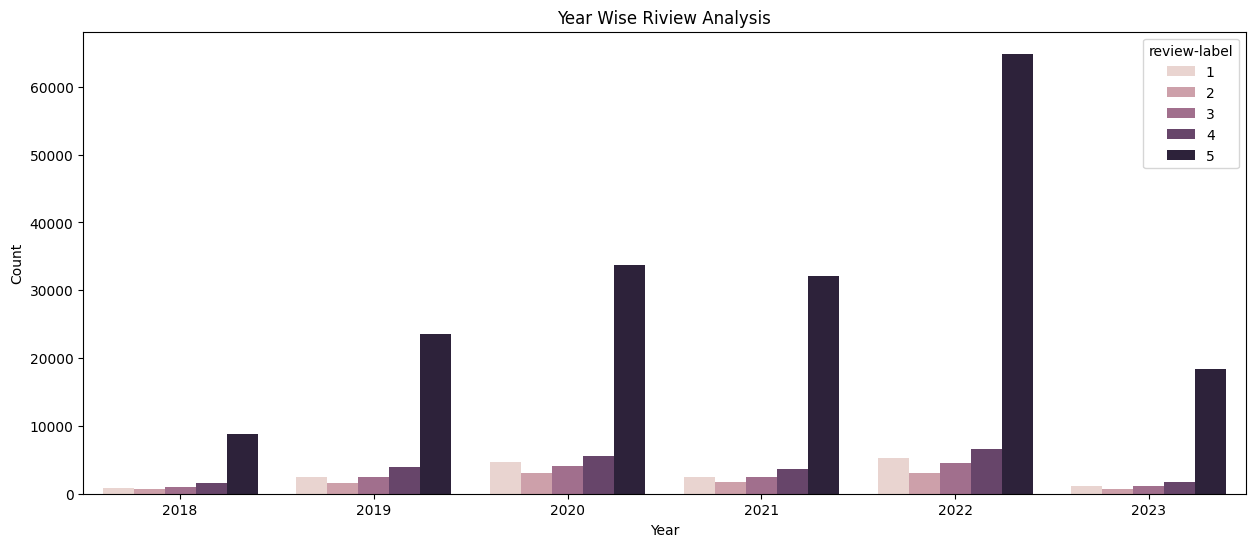

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'date' , data = df, hue = 'review-label')
plt.title('Year Wise Riview Analysis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='review-label',
                      title='Geospatial Distribution of Reviews')

fig.show()

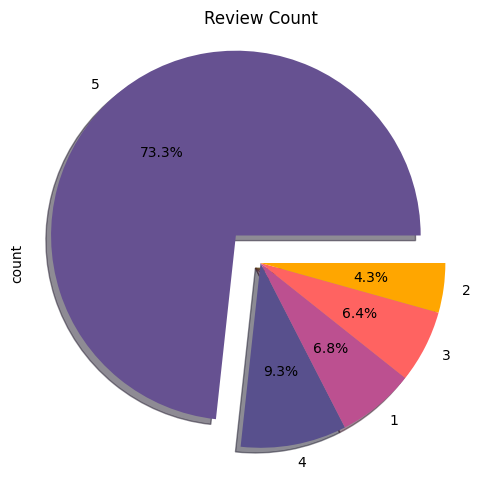

In [ ]:
plt.figure(figsize=(15,6))
df['review-label'].value_counts().plot.pie(autopct='%1.1f%%',
                                           explode = [0.2,0,0,0,0],
                                           colors = ['#665191','#58508d','#bc5090','#ff6361','#ffa600'],
                                           shadow = True)
plt.title('Review Count')
plt.show()

**Dropping Unnecessary columns**

In [ ]:
df.drop(['reviewer_id','store_location','latitude','longitude','date','month','year','title'], axis=1, inplace=True)
df.head()

review  review-label
0  I had an order that was lost in transit. When ...             5
1  I ordered the wrong size tee and had difficult...             5
2  These guys offer the best customer service in ...             5
3  Looked for an obscure phrase on a shirt. Teepu...             5
4  My order arrived in a good timely fashion & th...             4

**Data Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def preprocess(text):

  #Tokenization
  tk = TweetTokenizer()
  text = text.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))

  #Removing Non-Alphanumeric Charcters
  text = text.str.replace('[^a-zA-Z0-9]+',' ')

  #Removing Words With Length Less Than 3
  text = text.apply(lambda x: ' '.join([word for word in word_tokenize(x) if len(word)>=3]))

  #Stemming
  stemm = SnowballStemmer('english')
  text = text.apply(lambda x: ' '.join([stemm.stem(i) for i in word_tokenize(x)]))

  #Stopwords Removal
  stop_words = set(stopwords.words('english'))
  text = text.apply(lambda x: ' '.join([word for word in tk.tokenize(x) if word not in stop_words]))

  return text

In [ ]:
Train_df = preprocess(df['review'])
Train_df

0         order lost transit call help custom servic rep...
1         order wrong size tee difficulti return websit ...
2         guy offer best custom servic retail product hi...
3         look obscur phrase shirt teepubl process easi ...
4         order arriv good time fashion item receiv exac...
                                ...                        
278094    great site support independ artist give great ...
278095     deliveri quick arriv promis shirt qualiti origin
278096          great qualiti fast deliveri would recommend
278097                                    dude rock serious
278098      ship fast t-shirt right good compani suicid boy
Name: review, Length: 247587, dtype: object

**Vectorization**

In [ ]:
vec=TfidfVectorizer()
train_data=vec.fit_transform(Train_df)
train_data.shape

(247587, 42029)

In [ ]:
print(train_data)

  (0, 29548)	0.1639971540396476
  (0, 4450)	0.2567134382915103
  (0, 30559)	0.20810725632746002
  (0, 27190)	0.2281572985366169
  (0, 24313)	0.42474342706338547
  (0, 15855)	0.17383214045379505
  (0, 30141)	0.32459879453809853
  (0, 31973)	0.1417437248058787
  (0, 9651)	0.1554464350252471
  (0, 17149)	0.22447503980152134
  (0, 6801)	0.30951682070884773
  (0, 37737)	0.3641881540980615
  (0, 21522)	0.28271967140646237
  (0, 25538)	0.304699498008859
  (1, 12893)	0.15370431488003838
  (1, 27674)	0.36390107849676606
  (1, 17311)	0.17193724292958
  (1, 32461)	0.06681785479234854
  (1, 31888)	0.17045794699236078
  (1, 19095)	0.17349879248913863
  (1, 30256)	0.23954257154291517
  (1, 18253)	0.20959946295815762
  (1, 2792)	0.22617542133701943
  (1, 30285)	0.2205853215973279
  (1, 28512)	0.1989097897919189
  :	:
  (247582, 17311)	0.23501726934391964
  (247583, 28306)	0.566054908446135
  (247583, 10367)	0.34792587503390227
  (247583, 25752)	0.5191926307462074
  (247583, 29014)	0.31681005522708544

**Defining Train And Test Data**

In [ ]:
x = train_data
y = df['review-label']

**Splitting The Dataset into Training and Testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

**MODEL CREATION AND PERFORMANCE EVALUATION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

model = [LogisticRegression(C=1, solver='liblinear',max_iter=200), MultinomialNB(), LinearSVC(), DecisionTreeClassifier()]

In [ ]:
for i in model:
  print('Model :', i)
  print('_'*100)
  i.fit(x_train, y_train)
  y_pred = i.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('The accuracy of the model :',accuracy)
  print()
  print('Model Evaluation Performance')
  print(classification_report(y_test, y_pred))
  print('-'*100)

Model : LogisticRegression(C=1, max_iter=200, solver='liblinear')
____________________________________________________________________________________________________
The accuracy of the model : 0.8078947722713626

Model Evaluation Performance
              precision    recall  f1-score   support

           1       0.59      0.65      0.62      4995
           2       0.36      0.09      0.14      3276
           3       0.40      0.28      0.33      4670
           4       0.51      0.28      0.36      6947
           5       0.87      0.98      0.92     54389

    accuracy                           0.81     74277
   macro avg       0.55      0.46      0.48     74277
weighted avg       0.77      0.81      0.78     74277

----------------------------------------------------------------------------------------------------
Model : MultinomialNB()
____________________________________________________________________________________________________
The accuracy of the model : 0.74731074222